# TensorFlow Datasets

TensorFlow Datasets provides a collection of datasets ready to use with TensorFlow. It handles downloading and preparing the data and constructing a [`tf.data.Dataset`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset).

Copyright 2018 The TensorFlow Datasets Authors, Licensed under the Apache License, Version 2.0

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/datasets/overview"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/datasets/blob/master/docs/overview.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/datasets/blob/master/docs/overview.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

## Installation

`pip install tensorflow-datasets`

Note that `tensorflow-datasets` expects you to have TensorFlow already installed, and currently depends on `tensorflow` (or `tensorflow-gpu`) >= `1.13.0`.

In [0]:
!pip install -q tensorflow tensorflow-datasets matplotlib

In [0]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

import tensorflow_datasets as tfds

## Eager execution

TensorFlow Datasets is compatible with both TensorFlow [Eager mode](https://www.tensorflow.org/guide/eager) and Graph mode. For this colab, we'll run in Eager mode.

In [0]:
tf.enable_eager_execution()

## List the available datasets

Each dataset is implemented as a [`tfds.core.DatasetBuilder`](https://www.tensorflow.org/datasets/api_docs/python/tfds/core/DatasetBuilder) and you can list all available builders with `tfds.list_builders()`.

You can see all the datasets with additional documentation on the [datasets documentation page](https://github.com/tensorflow/datasets/blob/master/docs/datasets.md).

In [4]:
tfds.list_builders()

['bair_robot_pushing',
 'celeb_a',
 'cifar10',
 'cifar100',
 'diabetic_retinopathy_detection',
 'fashion_mnist',
 'image_label_folder',
 'imdb_reviews',
 'mnist']

## `tfds.load`: A dataset in one line

[`tfds.load`](https://www.tensorflow.org/datasets/api_docs/python/tfds/load) is a convenience method that's the simplest way to build and load and `tf.data.Dataset`.

Below, we load the MNIST training data. Setting `download=True` will download and prepare the data. Note that it's safe to call `load` multiple times with `download=True` as long as the builder `name` and `data_dir` remain the same. The prepared data will be reused.

In [5]:
mnist_train = tfds.load(name="mnist", split=tfds.Split.TRAIN)
assert isinstance(mnist_train, tf.data.Dataset)
mnist_train

INFO:tensorflow:Reusing dataset mnist (/root/tensorflow_datasets/mnist/1.0.0)
Instructions for updating:
Colocations handled automatically by placer.


<DatasetV1Adapter shapes: {image: (28, 28, 1), label: ()}, types: {image: tf.uint8, label: tf.int64}>

## Feature dictionaries

All `tfds` datasets contain feature dictionaries mapping feature names to Tensor values. A typical dataset, like MNIST, will have 2 keys: `"image"` and `"label"`. Below we inspect a single example.

Label: 0


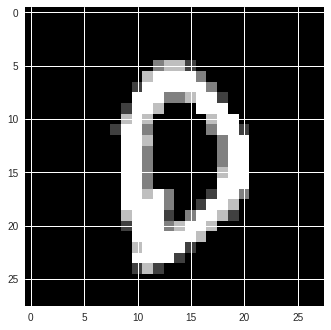

In [6]:
mnist_example, = mnist_train.take(1)
image, label = mnist_example["image"], mnist_example["label"]

plt.imshow(image.numpy()[:, :, 0].astype(np.float32), cmap=plt.get_cmap("gray"))
print("Label: %d" % label.numpy())

## `DatasetBuilder`

`tfds.load` is really a thin conveninence wrapper around `DatasetBuilder`. We can accomplish the same as above directly with the MNIST `DatasetBuilder`.

In [7]:
mnist_builder = tfds.builder("mnist")
mnist_builder.download_and_prepare()
mnist_train = mnist_builder.as_dataset(split=tfds.Split.TRAIN)
mnist_train

INFO:tensorflow:Reusing dataset mnist (/root/tensorflow_datasets/mnist/1.0.0)


<DatasetV1Adapter shapes: {image: (28, 28, 1), label: ()}, types: {image: tf.uint8, label: tf.int64}>

## Input pipelines

Once you have a `tf.data.Dataset` object, it's simple to define the rest of an input pipeline suitable for model training by using the [`tf.data` API](https://www.tensorflow.org/guide/datasets).

Here we'll repeat the dataset so that we have an infinite stream of examples, shuffle, and create batches of 32.

In [0]:
mnist_train = mnist_train.repeat().shuffle(1024).batch(32)

# prefetch will enable the input pipeline to asynchronously fetch batches while
# your model is training.
mnist_train = mnist_train.prefetch(tf.data.experimental.AUTOTUNE)

# Now you could loop over batches of the dataset and train
# for batch in mnist_train:
#   ...

## DatasetInfo

After generation, the builder contains useful information on the dataset:

In [9]:
info = mnist_builder.info
print(info)

tfds.core.DatasetInfo(
    name='mnist',
    version=1.0.0,
    description='The MNIST database of handwritten digits.',
    urls=[u'http://yann.lecun.com/exdb/mnist/'],
    features=FeaturesDict({'image': Image(shape=(28, 28, 1), dtype=tf.uint8), 'label': ClassLabel(shape=(), dtype=tf.int64)}),
    num_examples=70000,
    splits=[u'test', u'train'],
    examples_per_split=[10000L, 60000L],
    supervised_keys=(u'image', u'label'),
    citation='Y. Lecun and C. Cortes, "The MNIST database of handwritten digits," 1998.
[Online]. Available: http://yann.lecun.com/exdb/mnist/',
)



`DatasetInfo` also contains useful information about the features:

In [10]:
print(info.features)
print(info.features["label"].num_classes)
print(info.features["label"].names)

FeaturesDict({'image': Image(shape=(28, 28, 1), dtype=tf.uint8), 'label': ClassLabel(shape=(), dtype=tf.int64)})
10
[u'0', u'1', u'2', u'3', u'4', u'5', u'6', u'7', u'8', u'9']


You can also load the `DatasetInfo` directly with `tfds.load` using `with_info=True`.

In [11]:
dataset, info = tfds.load("mnist", split="test", with_info=True)
print(info)

INFO:tensorflow:Reusing dataset mnist (/root/tensorflow_datasets/mnist/1.0.0)
tfds.core.DatasetInfo(
    name='mnist',
    version=1.0.0,
    description='The MNIST database of handwritten digits.',
    urls=[u'http://yann.lecun.com/exdb/mnist/'],
    features=FeaturesDict({'image': Image(shape=(28, 28, 1), dtype=tf.uint8), 'label': ClassLabel(shape=(), dtype=tf.int64)}),
    num_examples=70000,
    splits=[u'test', u'train'],
    examples_per_split=[10000L, 60000L],
    supervised_keys=(u'image', u'label'),
    citation='Y. Lecun and C. Cortes, "The MNIST database of handwritten digits," 1998.
[Online]. Available: http://yann.lecun.com/exdb/mnist/',
)

